### I am practicing SQL skills(in SQLite DB) to answer business questions. I am gonna:
-  Write a SQL query to extract the relevant data
-  Create plots where necessary to visualize data
-  Write a short paragraph, drawing conclusions and explaining the data and/or visualizations.

#### Database schema
<img src="https://s3.amazonaws.com/dq-content/191/chinook-schema.svg" alt="The database chinook schema that we gonna use in this notebook" title="Database schema" />

In [5]:
#Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#Function that takes SQL query as an argument and returns pandas dataframe
def run_query(query):
    with sqlite3.connect('chinook.db')as conn:
        return(pd.read_sql(query, conn))

In [8]:
#Function that takes SQl query and executes it
def run_command(my_query):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolaltion_level = None
        conn.execute(query)

In [9]:
#Function to return a list of tables and views in database
def show_tables():
    my_query = "SELECT name, type FROM sqlite_master WHERE type IN ('table', 'view')"
    print(run_query(my_query))

In [10]:
show_tables()

              name   type
0            album  table
1           artist  table
2         customer  table
3         employee  table
4            genre  table
5          invoice  table
6     invoice_line  table
7       media_type  table
8         playlist  table
9   playlist_track  table
10           track  table


In [48]:
#Write a query that returns each genre, with the number of tracks sold
def find_tracks_genre():
    my_query = """WITH 
                    track_genre AS
                     (SELECT
                      t.track_id, g.genre_id,g.name
                      FROM
                      genre g
                      INNER JOIN track t ON t.genre_id = g.genre_id
                     ),
                     track_genre_all AS
                     (
                     SELECT * 
                     FROM 
                     track_genre tg
                     INNER JOIN
                     invoice_line il on il.track_id = tg.track_id
                     ),
                     track_genre_total AS
                     (
                     SELECT
                     tga.track_id,
                     tga.genre_id,
                     tga.name,
                     SUM(tga.quantity) total_quantity
                     FROM
                     track_genre_all tga
                     GROUP BY 2
                     ORDER BY 2
                     ),
                     track_genre_usa AS
                     (
                     SELECT
                     tga.genre_id,
                     tga.name,
                     SUM(tga.quantity) sales_usa
                     FROM
                     track_genre_all tga
                     INNER JOIN
                     invoice i ON tga.invoice_id = i.invoice_id
                     WHERE i.billing_country = "USA"
                     GROUP BY 1
                     ),
                     track_genre_sales_usa AS
                     (
                     SELECT
                     tgt.genre_id,
                     tgt.name,
                     tgt.total_quantity,
                     tgu.sales_usa
                     FROM
                     track_genre_total tgt
                     INNER JOIN
                     track_genre_usa tgu ON tgu.genre_id = tgt.genre_id
                     )
                     
                SELECT * FROM track_genre_sales_usa LIMIT 10"""
    return run_query(my_query)

In [49]:
genre_sales_usa = find_tracks_genre()

In [50]:
genre_sales_usa

,genre_id,name,total_quantity,sales_usa
0,1,Rock,2635,561
1,2,Jazz,121,14
2,3,Metal,619,124
3,4,Alternative & Punk,492,130
4,6,Blues,124,36
5,7,Latin,167,22
6,8,Reggae,35,6
7,9,Pop,63,22
8,10,Soundtrack,5,2
9,12,Easy Listening,74,13


The dataframe contains the name of the genre, total worldwide sales and the total sales in USA. We can perform arithmetic operation in dataframe to calculate the percentage sales in USA.

In [53]:
genre_sales_usa['percent_usa'] = (genre_sales_usa['sales_usa'] / genre_sales_usa['total_quantity'])*100

In [54]:
genre_sales_usa

,genre_id,name,total_quantity,sales_usa,percent_usa
0,1,Rock,2635,561,21.290323
1,2,Jazz,121,14,11.570248
2,3,Metal,619,124,20.032310
3,4,Alternative & Punk,492,130,26.422764
4,6,Blues,124,36,29.032258
5,7,Latin,167,22,13.173653
6,8,Reggae,35,6,17.142857
7,9,Pop,63,22,34.920635
8,10,Soundtrack,5,2,40.000000
9,12,Easy Listening,74,13,17.567568


In [55]:
#Make the name column index of the dataframe
genre_sales_usa.set_index("name", drop = True, inplace = True)

### Plot this dataframe

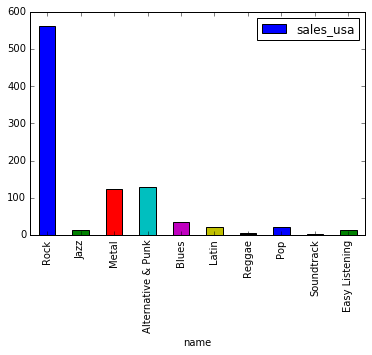

In [59]:
genre_sales_usa.plot.bar(y = 'sales_usa')

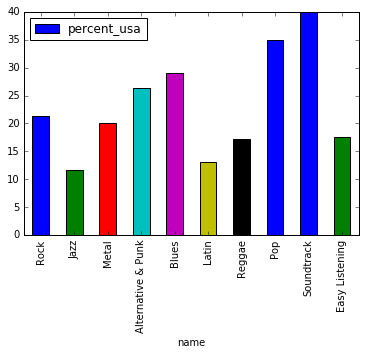

In [60]:
genre_sales_usa.plot.bar(y = 'percent_usa')

### The bar plot above shows the Rock genre is the highest sold genre USA. However, the highest percentage of Soundtrack was sold in the USA. The data available for the soundtrack was very few so we cannot make conclusion based of such limited data. The pop is second highest sold genre in USA and has relatively quiet large amount of data. Therefore, from the sales plot and the percentage plot I will recommed Pop, Blues and Alternative and punk genre.